In [13]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from statsmodels.stats.power import tt_ind_solve_power
import scipy.stats as stats
import math
import pandas as pd
import statsmodels.api as sm
from itertools import combinations 
import seaborn as sns

sns.set_theme()

In [2]:
cars = pd.read_csv('data/car_data.csv')

In [3]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [17]:
cars_mpg_weight = cars[['mpg', 'weight']]

In [10]:
cars_mpg_weight.mean()
corr = cars_mpg_weight.corr()

In [16]:
corr

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


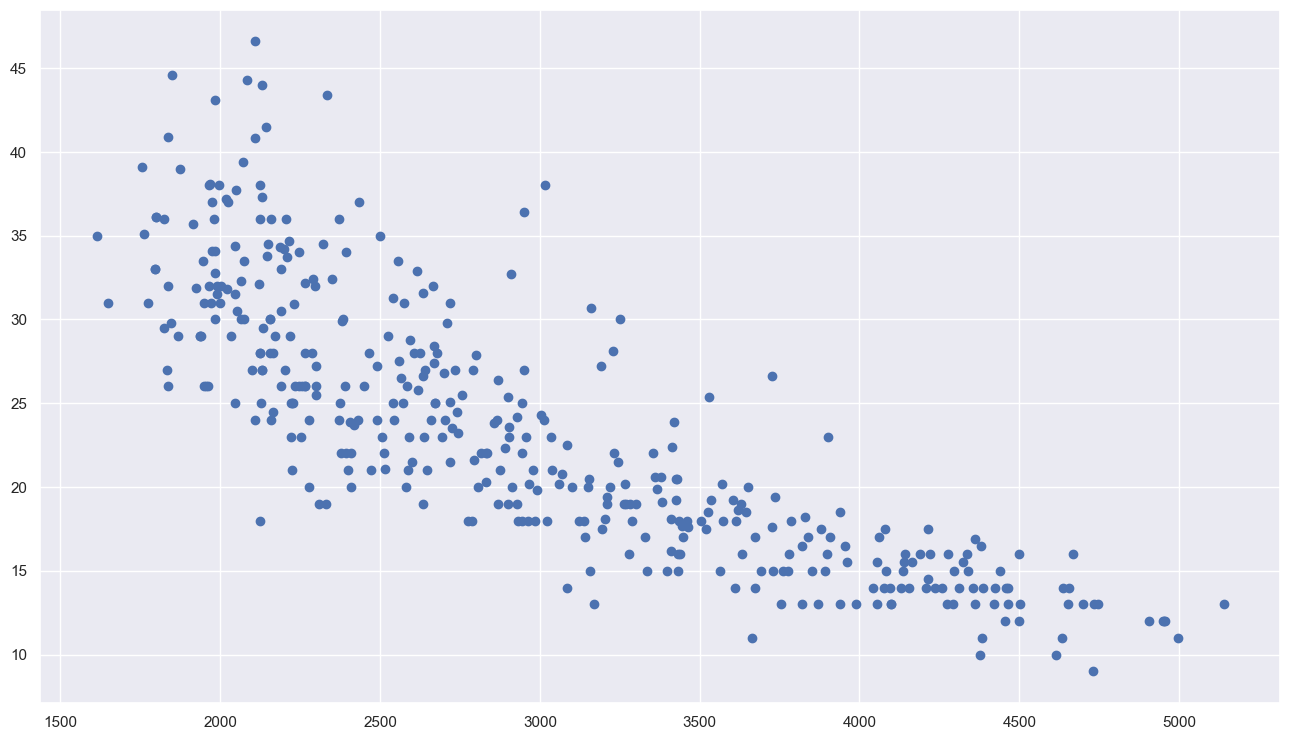

In [29]:
fig, ax = plt.subplots(figsize= (16, 9))
plt.scatter(cars_mpg_weight['weight'], cars_mpg_weight['mpg'])

<Axes: >

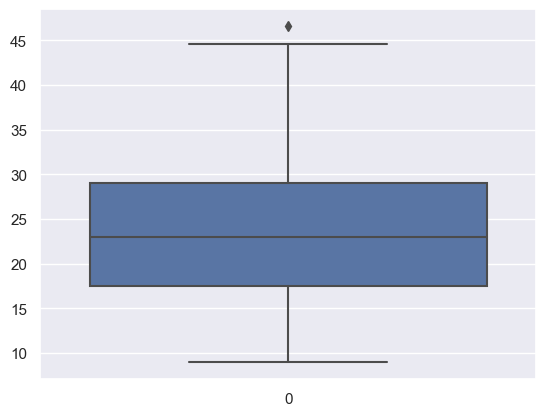

In [32]:
sns.boxplot(cars_mpg_weight['mpg'])


<Axes: >

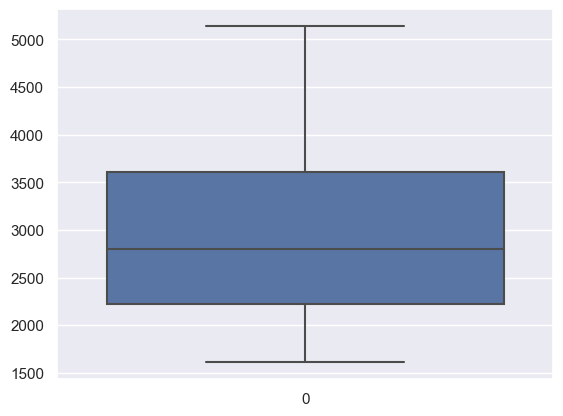

In [33]:
sns.boxplot(cars_mpg_weight['weight'])

<Axes: xlabel='mpg', ylabel='Count'>

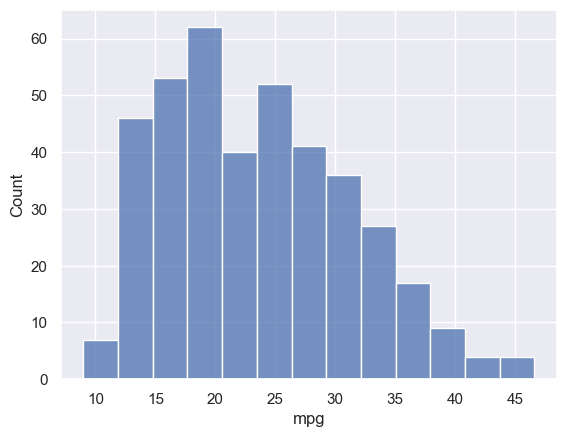

In [19]:
sns.histplot(cars_mpg_weight['mpg'])

<Axes: xlabel='weight', ylabel='Count'>

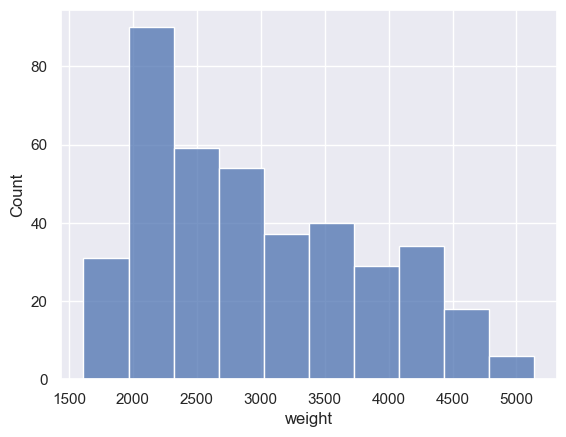

In [20]:
sns.histplot(cars_mpg_weight['weight'])

In [25]:
alpha = .05
weight_mean = cars_mpg_weight['weight'].mean()
weight_std = cars_mpg_weight['weight'].std(ddof=1)
mpg_mean = cars_mpg_weight['mpg'].mean()
mpg_mean = cars_mpg_weight['mpg'].std(ddof=1)

In [37]:
t = stats.ttest_ind(cars_mpg_weight['mpg'], cars_mpg_weight['weight'],
    equal_var=False, # Welch's
    alternative='two-sided')

In [38]:
t

TtestResult(statistic=-69.42048534934622, pvalue=3.6317583378490467e-224, df=397.06763684023593)

In [76]:
cars_mpg_weight['MPG_groups']= pd.cut(cars_mpg_weight['mpg'], [8, 15, 20, 25, 30, 35, 40, 47],labels = ['(8, 15]', '(15, 20]','(21, 25]', '(26, 30]','(31, 35]', '(36, 40]', '(41, 47)'], include_lowest=False)

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_4083/2824271471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_mpg_weight['MPG_groups']= pd.cut(cars_mpg_weight['mpg'], [8, 15, 20, 25, 30, 35, 40, 47],labels = ['(8, 15]', '(15, 20]','(21, 25]', '(26, 30]','(31, 35]', '(36, 40]', '(41, 47)'], include_lowest=False)


In [78]:
cars_mpg_weight

,mpg,weight,MPG_groups
0,18.0,3504.0,"(15, 20]"
1,15.0,3693.0,"(8, 15]"
2,18.0,3436.0,"(15, 20]"
3,16.0,3433.0,"(15, 20]"
4,17.0,3449.0,"(15, 20]"
...,...,...,...
393,27.0,2790.0,"(26, 30]"
394,44.0,2130.0,"(41, 47)"
395,32.0,2295.0,"(31, 35]"
396,28.0,2625.0,"(26, 30]"


In [77]:
sample_mean = cars_mpg_weight.groupby('MPG_groups').mean()
sample_mean.iloc[0, 1]

4196.608695652174

In [57]:
sample_std = cars_mpg_weight.groupby('MPG_groups').std(ddof=1)
sample_std.iloc[1, 1]

374.28240077313393

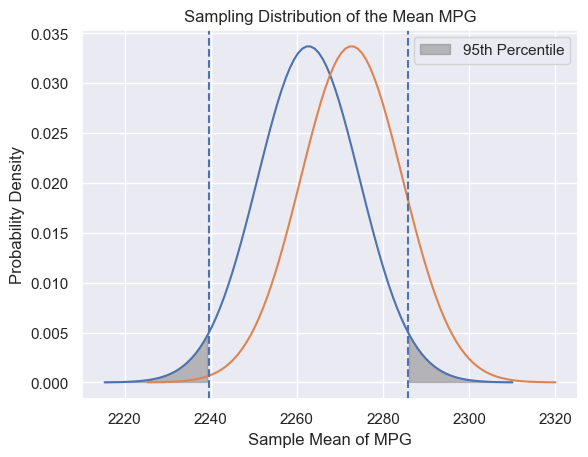

In [66]:
population_mean = cars_mpg_weight.groupby('MPG_groups').mean().iloc[1, 1] # caculates the mean of population
population_std = cars_mpg_weight.groupby('MPG_groups').std(ddof=1).iloc[1, 1] # caculates standard deviation
# Define the parameters for the alternate hypothesis
#population_mean2 = cars_mpg_weight.groupby('MPG_groups').mean().iloc[0, 1]
#population_std2 = cars_mpg_weight.groupby('MPG_groups').std(ddof=1).iloc[0, 1]

population_mean2 = population_mean + 10
population_std2 = population_std

sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error
standard_error2 = population_std2 / np.sqrt(sample_size)

# creates random variable
sampling_distribution_null = stats.norm(population_mean, 
                                        population_std / np.sqrt(sample_size))

sampling_distribution_alt = stats.norm(population_mean2, 
                                        population_std2 / np.sqrt(sample_size))
# rv_alt = norm(loc=sample_mean_alt, scale=standard_error_alt)

x = np.linspace(population_mean - 4 * (population_std / np.sqrt(sample_size)), 
                population_mean + 4 * population_std / np.sqrt(sample_size), 100)

x1 = np.linspace(population_mean2 - 4 * (population_std2 / np.sqrt(sample_size)), 
                population_mean2 + 4 * population_std2 / np.sqrt(sample_size), 100)

percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.plot(x1, sampling_distribution_alt.pdf(x1))
plt.axvline(percentile_95, linestyle="--")
plt.axvline(percentile_5, linestyle="--")

# This code shades the area that is between the 95th percentile
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x >= percentile_95) | (x <= percentile_5) , color='gray', alpha=0.5, label="95th Percentile") 
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend()
plt.show()

In [79]:
cars_mpg_weight

,mpg,weight,MPG_groups
0,18.0,3504.0,"(15, 20]"
1,15.0,3693.0,"(8, 15]"
2,18.0,3436.0,"(15, 20]"
3,16.0,3433.0,"(15, 20]"
4,17.0,3449.0,"(15, 20]"
...,...,...,...
393,27.0,2790.0,"(26, 30]"
394,44.0,2130.0,"(41, 47)"
395,32.0,2295.0,"(31, 35]"
396,28.0,2625.0,"(26, 30]"


In [84]:
cars_mpg_8_15 = cars_mpg_weight[cars_mpg_weight['MPG_groups']== '(8, 15]']
cars_mpg_15_20 = cars_mpg_weight[cars_mpg_weight['MPG_groups']== '(15, 20]']
cars_mpg_15_20 = cars_mpg_15_20['weight']
cars_mpg_8_15 = cars_mpg_8_15['weight']
cars_mpg_8_15_mean = cars_mpg_8_15.mean()
cars_mpg_15_20_mean = cars_mpg_15_20.mean()
cars_mpg_8_15_std = cars_mpg_8_15.std(ddof=1)
cars_mpg_15_20_std = cars_mpg_15_20.std(ddof=1)

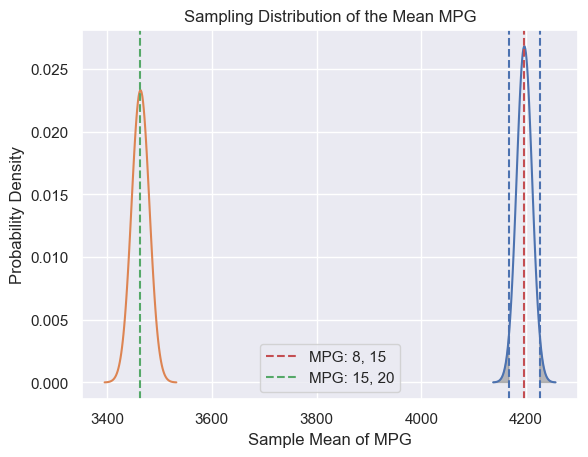

In [89]:
population_mean = cars_mpg_8_15.mean() # caculates the mean of population
population_std = cars_mpg_8_15.std(ddof=1) # caculates standard deviation
# Define the parameters for the alternate hypothesis
#population_mean2 = cars_mpg_weight.groupby('MPG_groups').mean().iloc[0, 1]
#population_std2 = cars_mpg_weight.groupby('MPG_groups').std(ddof=1).iloc[0, 1]

population_mean2 = cars_mpg_15_20.mean()
population_std2 = cars_mpg_15_20.std(ddof=1)

sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error
standard_error2 = population_std2 / np.sqrt(sample_size)

# creates random variable
sampling_distribution_null = stats.norm(population_mean, 
                                        population_std / np.sqrt(sample_size))

sampling_distribution_alt = stats.norm(population_mean2, 
                                        population_std2 / np.sqrt(sample_size))
# rv_alt = norm(loc=sample_mean_alt, scale=standard_error_alt)

x = np.linspace(population_mean - 4 * (population_std / np.sqrt(sample_size)), 
                population_mean + 4 * population_std / np.sqrt(sample_size), 100)

x1 = np.linspace(population_mean2 - 4 * (population_std2 / np.sqrt(sample_size)), 
                population_mean2 + 4 * population_std2 / np.sqrt(sample_size), 100)

percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.plot(x1, sampling_distribution_alt.pdf(x1))
plt.axvline(percentile_95, linestyle="--")
plt.axvline(percentile_5, linestyle="--")
plt.axvline(population_mean, linestyle="--", color='r', label='MPG: 8, 15')
plt.axvline(population_mean2, linestyle="--", color='g', label='MPG: 15, 20')


# This code shades the area that is between the 95th percentile
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x >= percentile_95) | (x <= percentile_5) , color='gray', alpha=0.5)#, label="95th Percentile") 
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend()
plt.show()

In [90]:
stats.ttest_ind(cars_mpg_8_15, cars_mpg_15_20, equal_var=False, # Welch's
    alternative='two-sided')

TtestResult(statistic=9.141399611975768, pvalue=3.2724981200838053e-16, df=155.00855545938398)